# Behavioral Cloning Project: Data Preprocessing

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Number of log entries: 8036
Images shape: (160, 320, 3)


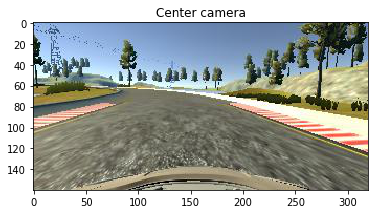

In [11]:
# Load driving log into a pandas data frame.
log = pd.read_csv('./data/driving_log.csv')

print('Number of log entries:', log.shape[0])

# Display a random center camera image.
ind = np.random.randint(0, log.shape[0])

# Read in images from center, left and right cameras.
imgs_dir = './data/'
img_center = mpimg.imread(imgs_dir + log['center'][ind])
img_left = mpimg.imread(imgs_dir + log['left'][ind][1:])  # Delete leading space.
img_right = mpimg.imread(imgs_dir + log['right'][ind][1:])  # Delete leading space.
    
# Flip images.
img_center_flip = np.fliplr(img_center)
img_left_flip = np.fliplr(img_left)
img_right_flip = np.fliplr(img_right)

# Steering angle and flipped steering angle for center camera.
steering_center = float(log['steering'][ind])
steering_center_flip = -steering_center

print('Images shape:', img_center.shape)

plt.title('Center camera')
plt.imshow(img_center)
plt.show()

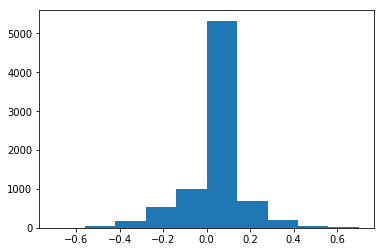

In [22]:
# To measure data imbalance, create plot of steering angles.
plt.hist(log['steering'], range=(-0.7, 0.7))
plt.show()

We seem to be turning left more. This bias can be corrected by making flipped copies of all the images.

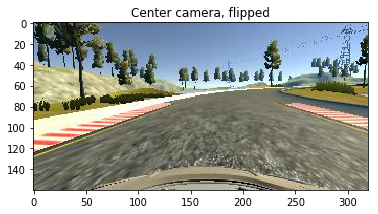

In [13]:
plt.title('Center camera, flipped')
plt.imshow(img_center_flip)
plt.show()

The images on the horizon and the roof of the car are not relevant information to the model, so let's crop them out.

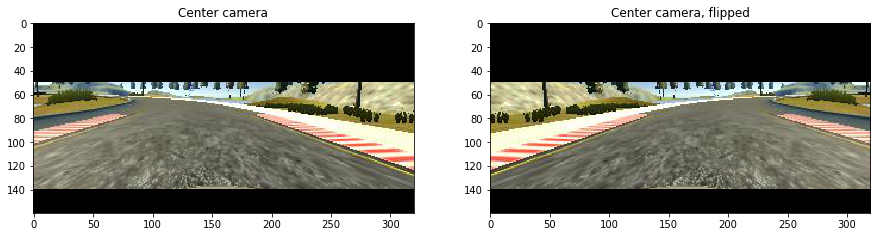

In [14]:
TOP_CROP = 50
BOTTOM_CROP = 20

def crop(img):
  """Crops top and bottom from image."""
  copy = np.copy(img)
  copy[0:TOP_CROP, :, :] = 0
  copy[copy.shape[0] - BOTTOM_CROP:copy.shape[0], :, :] = 0
  return copy

crop_center = crop(img_center)
crop_left = crop(img_left)
crop_right = crop(img_right)

crop_center_flip = crop(img_center_flip)
crop_left_flip = crop(img_left_flip)
crop_right_flip = crop(img_right_flip)

plt.figure(figsize=(15, 15))
plt.subplot(121).set_title('Center camera')
plt.imshow(crop_center)
plt.subplot(122).set_title('Center camera, flipped')
plt.imshow(crop_center_flip)
plt.show()

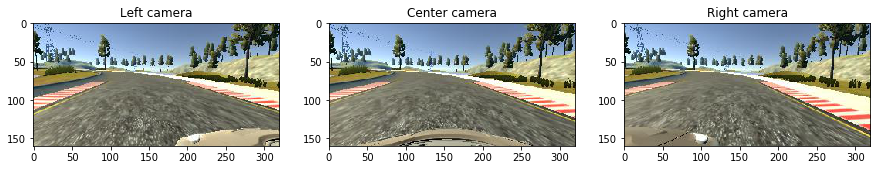

In [15]:
plt.figure(figsize=(15, 15))
plt.subplot(131).set_title('Left camera')
plt.imshow(img_left)
plt.subplot(132).set_title('Center camera')
plt.imshow(img_center)
plt.subplot(133).set_title('Right camera')
plt.imshow(img_right)
plt.show()

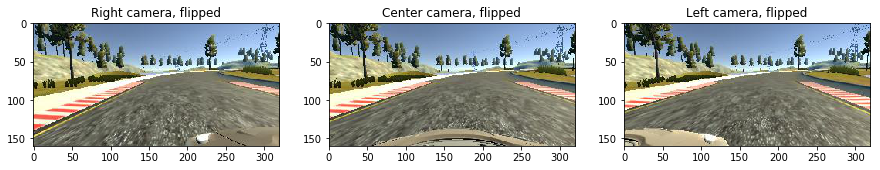

In [16]:
plt.figure(figsize=(15, 15))
plt.subplot(131).set_title('Right camera, flipped')
plt.imshow(img_right_flip)
plt.subplot(132).set_title('Center camera, flipped')
plt.imshow(img_center_flip)
plt.subplot(133).set_title('Left camera, flipped')
plt.imshow(img_left_flip)
plt.show()

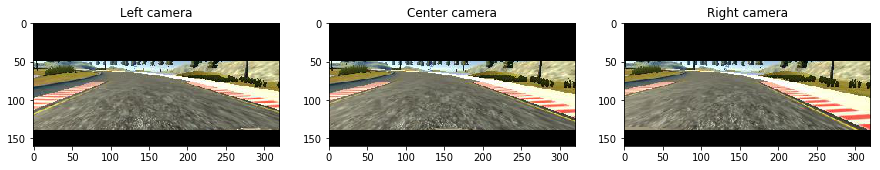

In [17]:
plt.figure(figsize=(15, 15))
plt.subplot(131).set_title('Left camera')
plt.imshow(crop_left)
plt.subplot(132).set_title('Center camera')
plt.imshow(crop_center)
plt.subplot(133).set_title('Right camera')
plt.imshow(crop_right)
plt.show()

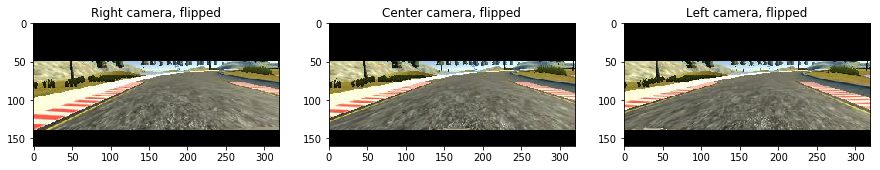

In [18]:
plt.figure(figsize=(15, 15))
plt.subplot(131).set_title('Right camera, flipped')
plt.imshow(crop_right_flip)
plt.subplot(132).set_title('Center camera, flipped')
plt.imshow(crop_center_flip)
plt.subplot(133).set_title('Left camera, flipped')
plt.imshow(crop_left_flip)
plt.show()